# Datation des surfaces planétaires par distribution en fréquence de taille des cratères d'impact

Les surfaces des planètes et lunes telluriques sont recouvert de cratères d'impact.
Les cratères sont formés par le flux constant d'astéroïdes qui heurtent la surface de la Terre.
Le principe de base est très simple, plus on observe de cratères sur une surface géologique plus cette dernière est vielle.
Ce notebook a trois objectifs :
- Comprendre comment les surfaces planétaires sont datées
- Avoir un exemple d'utilisation d'un modèle et comment l'exploiter au mieux
- Découvrir le concept de notebook et présenter du code python de façon interactive


## Observations

### Introduction

![alt text](Figures/moon_surfaces.png "Deux surfaces lunaires d'âges différents")

Comme illustré par ces deux images, le nombre de cratères sur une surface géologique dépend principalement de son âge.
On ne peut cependant pas simplement comparer le nombre de cratères sur deux surfaces, en effet un second phénomène entre en jeu : plus les cratères sont petits, plus ils sont nombreux. Il faut donc absolument prendre en compte le diamètre des cratères.
La première étape consiste donc à réaliser une cartographie des cratères sur un logiciel de SIG. On peut alors facilement calculer le diamètre de chaque cratère et exporter un fichier exploitable dans le logiciel de votre choix (ici python). Les informations indispensables pour la suite de l'analyse sont :
- Une liste des diamètres de tous les cratères de la zone
- La surface sur laquelle a été réalisée la cartographie

### Import des données

Commençons donc par importer ces données :

In [1]:
# Ce code importe toutes les extensions python dont nous allons nous servir
import ipywidgets as widgets
from IPython.display import Javascript, display
from osgeo import ogr
from matplotlib import pyplot as plt
import numpy as np
from decimal import Decimal

style = {'description_width': 'initial'}
layout = widgets.Layout(width='auto', height='60px')

In [2]:
# Ce code permet d'importer les données de cartographie

cheminShapefileCratere = widgets.Text(
    value='Data/CRATER_Hercules.shp',
    placeholder='Data/CRATER_Hercules.shp',
    layout = widgets.Layout(width='200px', height='40px'),
)
labelCheminDiam = widgets.Label(
    r"Chemin vers le fichier de cartographie de cratère :",
    layout = widgets.Layout(display="flex", width='350px', height='40px', justify_content="flex-end"),
)
nomDiamInput = widgets.Text(
    value='diam_km',
    placeholder='diam_km',
    layout = widgets.Layout(width='80px', height='40px')
)
labelNomDiam = widgets.Label(
    r"Nom de la colonne d'attribut pour le diamètre :",
    layout = widgets.Layout(display="flex", width='350px', height='40px', justify_content="flex-end"),
)
cratereBox = widgets.HBox(
    [labelCheminDiam, cheminShapefileCratere, labelNomDiam, nomDiamInput],
    layout = widgets.Layout(border="solid"),
)

cheminShapefileAire= widgets.Text(
    value='Data/AREA_Hercules.shp',
    placeholder='Data/AREA_Hercules.shp',
    layout = widgets.Layout(width='200px', height='40px'),
)
labelCheminAire = widgets.Label(
    r"Chemin vers le fichier shapefile de la zone cartographiée :",
    layout = widgets.Layout(display="flex", width='350px', height='40px', justify_content="flex-end"),
)
nomAireInput = widgets.Text(
    value='area_km2',
    placeholder='area_km2',
    layout = widgets.Layout(width='80px', height='40px'),
)
labelNomAire = widgets.Label(
    "Nom de la colonne d'attribut pour l'aire :",
    layout = widgets.Layout(display="flex", width='350px', height='40px', justify_content="flex-end"),
)
aireBox = widgets.HBox(
    [labelCheminAire, cheminShapefileAire, labelNomAire, nomAireInput],
    layout = widgets.Layout(border="solid"),
)

display(widgets.VBox([cratereBox, aireBox]))

In [3]:
# Ce morceau de code ouvre les fichiers et importe les données sous forme de vecteurs

driver = ogr.GetDriverByName('ESRI Shapefile')

# Ouverture du shapefile de cartographie et récupération des diamètres dans un vecteur
cratFilePath = cheminShapefileCratere.value
diamField = nomDiamInput.value
craterShp = ogr.Open(cratFilePath, 0)
cratLayer = craterShp.GetLayer()
featureCount = cratLayer.GetFeatureCount()

# On itère sur tous les cratères et on récupère le diamètre
diamCrat = np.zeros(featureCount)
for index in range(0, featureCount):
    crater = cratLayer.GetFeature(index)
    diamCrat[index] = crater.GetField(diamField)
craterShp = None


# Ouverture du shapefile de l'aire cartographiée et récupération de l'aire
aireFilePath = cheminShapefileAire.value
aireField = nomAireInput.value
aireShp = ogr.Open(aireFilePath, 0)
aireLayer = aireShp.GetLayer()
aireFeat = aireLayer.GetFeature(0)

aire = aireFeat.GetField(aireField)
aireShp = None

print("{} cratères sur une surface de {:.0f} km². Soit une densité de {:.2E} cratères/km²".format(
    diamCrat.size, aire, Decimal(diamCrat.size/aire)
))
print("Liste des diamètres (en km) :")

print(diamCrat)

80 cratères sur une surface de 41287 km². Soit une densité de 1.94E-3 cratères/km²
Liste des diamètres (en km) :
[ 4.28601  7.50853  9.40109  2.22648  2.17502  1.49464  2.3434   3.48797
  1.57569  2.13829  2.6093   2.05368  1.72943  3.24642  2.35959  1.77693
  1.6205   2.6826   3.98696  2.40331  3.02525  2.88067  3.00933  2.85528
  3.54441  1.38317  2.64902  3.16086  2.39121  1.76435  1.7534   3.34037
  1.59587  1.15199  1.35121  1.18435  1.85654  7.32694  1.73757  1.2249
  2.78694  2.26757  1.74007  2.83445  1.80193  3.69861  4.84012  2.10441
  2.10329  1.21098  1.53157  2.21051  2.41321  3.3413   2.82489  1.82463
  1.20156  2.53457  1.53026  2.77301  1.08916  1.682    1.57881  1.49872
  1.29161  2.4208   2.10754  1.51224  1.86603  2.19193  3.63221  4.15193
  1.58029  1.7893   1.24506 10.39671  2.2592   2.19285  3.24564  2.1287 ]


ERROR 1: PROJ: proj_identify: Open of /home/user/anaconda3/envs/CraterMorphologyTools/share/proj failed
ERROR 1: PROJ: proj_identify: Open of /home/user/anaconda3/envs/CraterMorphologyTools/share/proj failed


### Représentation graphique

On a donc désormais la liste des diamètres sous forme d'un vecteur. Cependant, cette liste n'est pas facile à analyser. Nous allons représenter nos données sous forme graphique. Dans notre cas, la meilleure façon de représenter nos données est sous forme d'un histogramme. C'est-à-dire que nous allons compter le nombre de cratères dans une gamme de diamètre (= classe de diamètre). La bibliothèque matplotlib de python contient des fonctions capables de réaliser un histogramme à partir d'un vecteur de donnée.

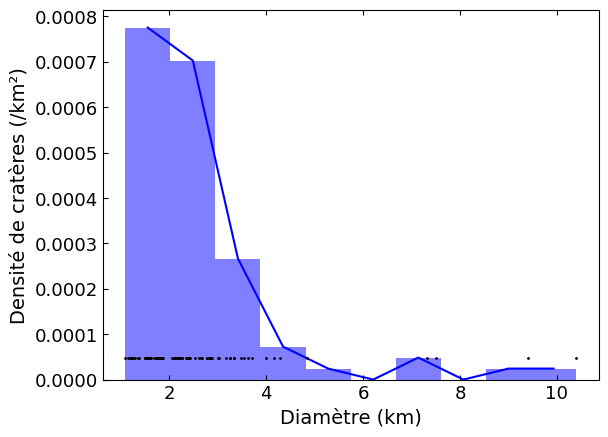

In [4]:
# Ces lignes créent la figure et nomment les axes
figure =  plt.figure()
sousFigure = figure.add_subplot(111)
sousFigure.set_ylabel(r'Densité de cratères (/km²)', fontsize=14)
sousFigure.set_xlabel(r'Diamètre (km)', fontsize=14)
sousFigure.tick_params(direction='in', top=True, which='both', labelsize=13)

# Cette ligne permet de créer un histogramme des données
nombreCrateres, classesDiam = np.histogram(diamCrat)
densiteCrateres = nombreCrateres/aire

# Cette ligne réalise la figure de l'histogramme
sousFigure.bar(classesDiam[:-1], densiteCrateres, width=np.diff(classesDiam), color = "blue", alpha = 0.5, align="edge")
# On ajoute un graphique en ligne
sousFigure.plot((classesDiam[:-1]+classesDiam[1:])/2, densiteCrateres, 'b')
# Cette ligne permet de représenter une croix pour chaque cratère
sousFigure.plot(diamCrat, np.full(np.size(diamCrat), np.min(densiteCrateres[np.nonzero(densiteCrateres)]) * 2), 'ko', markersize = 1)

Voici donc notre première distribution en taille des cratères. Cette représentation peut cependant être améliorée. Pour commencer, on constate que le nombre de cratères augmente exponentiellement pour les petits diamètres. Par convention, on utilise une double échelle logarithmique. Attention, il faut aussi utiliser des classes de diamètre logarithmique. Cette fois-ci, Python ne propose pas une solution simple et il faut créer les classes nous même. Allez, on recommence :

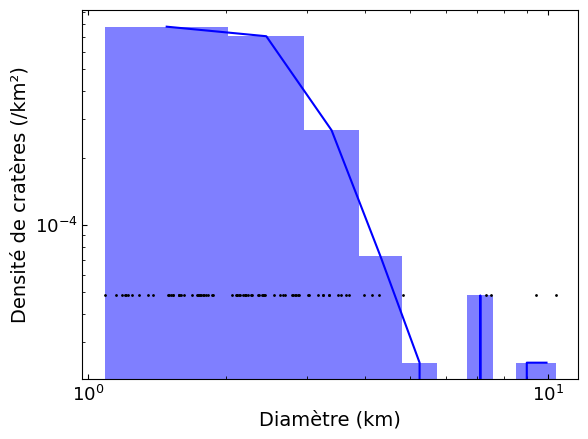

In [5]:
# On commence par créer les classes de diamètres
# On définit une fonction car nous allons réutiliser ce bout de code
def creationClasseLogarithmiques(nbClasses, diamMin, diamMax):
    # La bibliothèque numpy permet de faire des opérations sur les vecteurs
    tailleClasseDiamLog = (np.log10(diamMax) - np.log10(diamMin)) / nbClasses
    return 10 ** (np.log10(diamMin) + np.arange(0, nbClasses + 1) * tailleClasseDiamLog)

# Maintenant, utilisons notre fonction
nbClasses = 10
diamMin = np.min(diamCrat)
diamMax = np.max(diamCrat)
classeDiam =  creationClasseLogarithmiques(nbClasses, diamMin * 0.99, diamMax * 1.11)

# Ces lignes créent la figure et nomment les axes
figure =  plt.figure()
sousFigure = figure.add_subplot(111)
sousFigure.set_ylabel(r'Densité de cratères (/km²)', fontsize=14)
sousFigure.set_xlabel(r'Diamètre (km)', fontsize=14)
sousFigure.set_xscale('log')
sousFigure.set_yscale('log')
sousFigure.tick_params(direction='in', top=True, which='both', labelsize=13)

# Cette fois-ci, on ajoute en paramètre les classes de diamètre que l'on vient de créer
nombreCrateres, classesDiam = np.histogram(diamCrat, bins=classesDiam)
densiteCrateres = nombreCrateres/aire

sousFigure.bar(classesDiam[:-1], densiteCrateres, width=np.diff(classesDiam), color = "blue", alpha = 0.5, align="edge")
sousFigure.plot(np.sqrt(classesDiam[:-1]*classesDiam[1:]), densiteCrateres, 'b')
sousFigure.plot(diamCrat, np.full(np.size(diamCrat), np.min(densiteCrateres[np.nonzero(densiteCrateres)]) * 2), 'ko', markersize = 1)

Voici donc une représentation légèrement améliorée, mais que se passe-t-il si l'on change le nombre de classes utilisées ? Essayez de modifier le code ci-dessous en changeant le nombre de classes utilisées. Quels sont les problèmes rencontrés lorsqu'on change le nombre de classes ? Quelles solutions proposer à ces problèmes ?

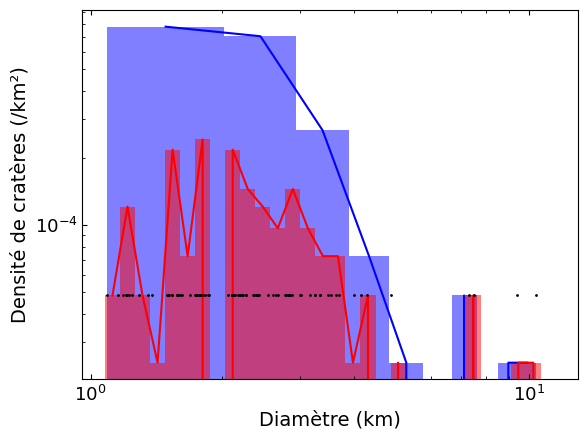

In [6]:
votreNombreClasses = 30
vosClasses = creationClasseLogarithmiques(votreNombreClasses, diamMin * 0.99, diamMax * 1.11)

# On refait la même figure
figure =  plt.figure()
sousFigure = figure.add_subplot(111)
sousFigure.set_ylabel(r'Densité de cratères (/km²)', fontsize=14)
sousFigure.set_xlabel(r'Diamètre (km)', fontsize=14)
sousFigure.set_xscale('log')
sousFigure.set_yscale('log')
sousFigure.tick_params(direction='in', top=True, which='both', labelsize=13)

nombreCrateres, classesDiam = np.histogram(diamCrat, bins=classesDiam)
densiteCrateres = nombreCrateres/aire
sousFigure.bar(classesDiam[:-1], densiteCrateres, width=np.diff(classesDiam), color = "blue", alpha = 0.5, align="edge")
sousFigure.plot(np.sqrt(classesDiam[:-1]*classesDiam[1:]), densiteCrateres, 'b')

# On ajoute le nouvel histogramme en rouge
nombreCrateres2, vosClasses = np.histogram(diamCrat, bins=vosClasses)
densiteCrateres2 = nombreCrateres2/aire

sousFigure.bar(vosClasses[:-1], densiteCrateres2, width=np.diff(vosClasses), color = "red", alpha =0.5, align="edge")
sousFigure.plot(np.sqrt(vosClasses[:-1]*vosClasses[1:]), densiteCrateres2, 'r')

sousFigure.plot(diamCrat, np.full(np.size(diamCrat), np.min(densiteCrateres[np.nonzero(densiteCrateres)]) * 2), 'ko', markersize = 1)

On peut constater plusieurs problèmes :
- 1 : Le nombre de cratères dépend de la taille des classes
- 2 : Si le nombre de classes est trop grand les classes ne peuvent contenir que 0 ou 1 cratères
- 3 : Si le nombre de classes est trop faible, on perd l'information sur la distribution

Les problèmes 2 et 3 sont particulièrement compliqués à régler. Le choix du "bon" nombre de classes est particulièrement compliqué et relève de problèmes statistiques compliqués.
Le problème 1 est facile à régler, en effet, on peut normaliser le nombre de cratères dans une classe, c'est-à-dire diviser le nombre de cratères par la taille de la classe. On obtient donc un nombre de cratères/km³.

On peut refaire la figure précédente en appliquant cette opération pour observer que la densité ne dépend plus du nombre de classes.

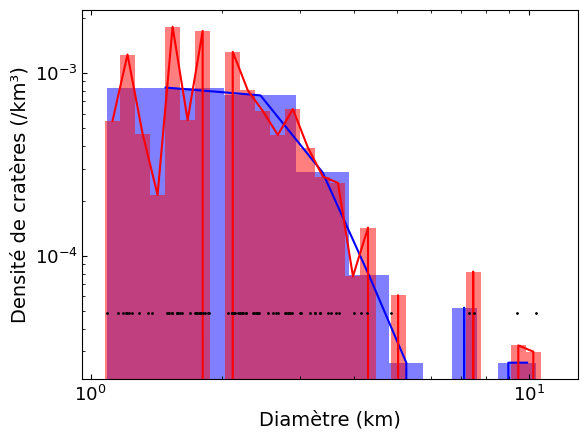

In [7]:
densiteNorm = densiteCrateres/np.diff(classesDiam)
densiteNorm2 = densiteCrateres2/np.diff(vosClasses)


# On refait la même figure
figure =  plt.figure()
sousFigure = figure.add_subplot(111)
sousFigure.set_ylabel(r'Densité de cratères (/km³)', fontsize=14)
sousFigure.set_xlabel(r'Diamètre (km)', fontsize=14)
sousFigure.set_xscale('log')
sousFigure.set_yscale('log')
sousFigure.tick_params(direction='in', top=True, which='both', labelsize=13)


sousFigure.bar(classesDiam[:-1], densiteNorm, width=np.diff(classesDiam), color = "blue", alpha=0.5, align="edge")
sousFigure.plot(np.sqrt(classesDiam[:-1]*classesDiam[1:]), densiteNorm, 'b')
sousFigure.bar(vosClasses[:-1], densiteNorm2, width=np.diff(vosClasses), color = "red", alpha=0.5, align="edge")
sousFigure.plot(np.sqrt(vosClasses[:-1]*vosClasses[1:]), densiteNorm2, 'r')

sousFigure.plot(diamCrat, np.full(np.size(diamCrat), np.min(densiteCrateres[np.nonzero(densiteCrateres)]) * 2), 'ko', markersize = 1)

### Pour aller plus loin

On constate dans cette dernière figure que la densité de cratère normalisée ne varie plus en fonction du nombre de classes utilisé.

Les problèmes soulevés dans le cas d'un nombre de classes trop petit ou trop grand persistent. Afin de contourner ce problème, on peut faire appel à des techniques statistiques plus compliquées : l'estimation par noyau qui permet d'obtenir une représentation continue de la densité de cratères.

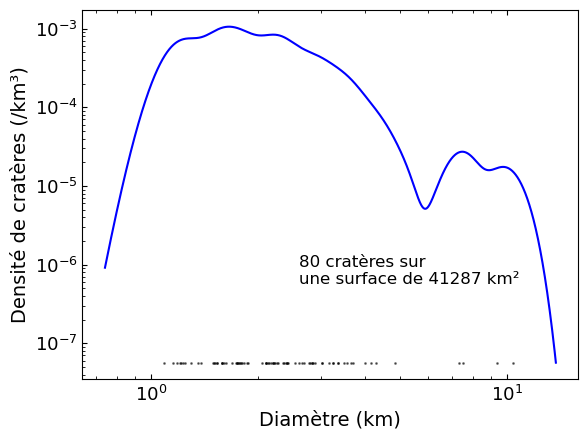

In [8]:
# Ce morceau de code calcule une distribution en fréquence de taille grâce à une méthode d'estimation par noyau
def fast_proba(Diam, Diam_bin, D_err_f=0.1):
    proba = np.zeros(len(Diam_bin) - 1)
    # iterate through craters
    for i_crat in range(0, len(Diam)):
        D_err = D_err_f * Diam[i_crat]
        # compute an array with the distance to the crat in diam
        Diam_proba = 1 / (D_err * np.sqrt(2 * np.pi)) * np.exp(-1 / 2 * ((Diam[i_crat] - Diam_bin) / D_err) ** 2)
        Diam_proba_int = (Diam_proba[1:] + Diam_proba[:-1]) / 2 * (Diam_bin[1:] - Diam_bin[:-1])
        proba = proba + Diam_proba_int
    return proba


vecteurEstimationNoyau = creationClasseLogarithmiques(4000, diamMin * 0.68, diamMax * 1.32)
CSFD = fast_proba(diamCrat, vecteurEstimationNoyau, D_err_f=0.1) / aire / np.diff(vecteurEstimationNoyau)

def initalisationFigureDensite():
    figure =  plt.figure()
    sousFigure = figure.add_subplot(111)
    sousFigure.set_ylabel(r'Densité de cratères (/km³)', fontsize=14)
    sousFigure.set_xlabel(r'Diamètre (km)', fontsize=14)
    sousFigure.set_xscale('log')
    sousFigure.set_yscale('log')
    sousFigure.tick_params(direction='in', top=True, which='both', labelsize=13)
    return figure, sousFigure

def figureDensite(sousFigure, vecteurDiam, densiteCrateres, color = 'blue'):
    sousFigure.plot(np.sqrt(vecteurDiam[1:]*vecteurDiam[:-1]), densiteCrateres, color = color)

    return

def figureCrateres(sousFigure, diamCrat, aire):
    sousFigure.plot(diamCrat, np.full(np.size(diamCrat), np.nanmin(CSFD)), 'ko', markersize = 1, alpha = 0.5)
    sousFigure.annotate(
        "{} cratères sur\nune surface de {:.0f} km²".format(diamCrat.size, aire),
        xy = (diamCrat[10], np.nanmin(CSFD)*10),
        xycoords='data',
        horizontalalignment='left',
        fontsize = 12,
        color = 'k'
    )
    return

figure, sousFigure = initalisationFigureDensite()
figureDensite(sousFigure, vecteurEstimationNoyau, CSFD)
figureCrateres(sousFigure, diamCrat, aire)

### Conclusion

Nous venons de représenter une distribution en fréquence de taille de cratères. Cette distribution est caractéristique d'une surface planétaire. Elle dépend principalement de :
- L'âge de la surface : plus la surface est vielle, plus la densité de cratère est importante
- Le corps planétaire considéré

À partir de ces données, on peut modéliser la population de cratère sur une planète donnée d'un âge donné.

## Modélisation

L'observation des densités de cratères en fonction de leur taille dans de nombreuses conditions différentes (population d'astéroïdes, cratères lunaires, cratères martiens...) a permis de modéliser le nombre de cratères en fonction de leur taille.

La formule suivante, appelée fonction de production, décrit la relation entre densité de cratère et diamètre :

$$
\log(Freq_{crat}({age},{Diam}))= \log(a_0( {age} ) + \sum_{i=1}^{n}\left(a_i \times \log({Diam})^i\right)
$$

Dans cette équation, les coefficients $a_i$ ont été déterminés empiriquement (il y en a 12 au total).

Les datations des roches lunaires rapportées par les missions Apollo ont permis, pour une dizaine de surfaces géologiques d'associer un âge à une densité de cratère. La figure suivante décrit le nombre de cratères de plus de 1 km de diamètre en fonction de l'âge de la surface. Les surfaces datées sont représentées par les points.

![alt text](Figures/calibrationchrono.jpg "Nombre de cratères de plus de 1 km de diamètre en fonction de l'âge de la surface.")

Les chercheurs ont alors pu ajouter dans l'équation l'âge de la surface décrit par l'équation suivante (courbe noire dans la figure précédente) :

$$
$Freq_{crat}=\frac{N_{crat}}{area*\delta Diam}$
$$


On peut donc modéliser la distribution en fréquence de taille d'une surface donnée, le code suivant vous permet de choisir les paramètres de votre modélisation et de visualiser le résultat.

In [9]:
# Ce code permet de choisir l'âge modélisé ainsi que la gamme de diamètre

# Choix de l'âge
ageSlider = widgets.FloatSlider(value = 3, min = 0.1, max = 4, step = 0.1, description = r'Age (Ga) :')
diamMinInput = widgets.BoundedFloatText(
    value=0.5,
    min=0.1,
    max=9.0,
    description='Diamètre minimal (km) :',
    disabled=False,
    style =style
)
diamMaxInput = widgets.BoundedFloatText(
    value=50,
    min=10,
    max=500,
    description='Diamètre maximal (km) :',
    disabled=False,
    style =style
)
diamModelSelection = widgets.HBox([diamMinInput, diamMaxInput])

def run_model(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+4)'))


boutonModele = widgets.Button(description="Modéliser")
boutonModele.on_click(run_model)
display(widgets.VBox([ageSlider, diamModelSelection]))

boutonModele

Button(description='Modéliser', style=ButtonStyle())

3.0


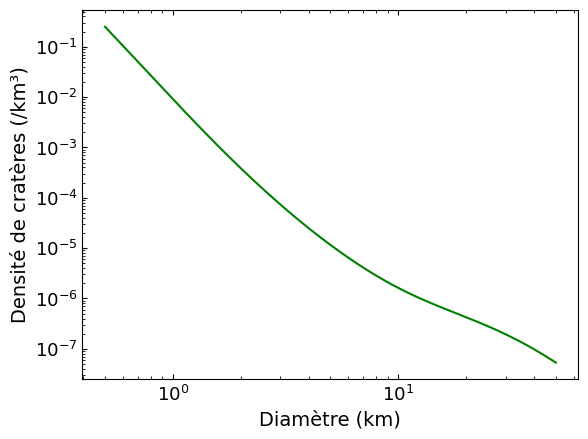

In [10]:
# Ce morceau de code permet de modéliser une distribution en fréquence de taille de cratère pour un âge donné (=isochrone)

age = ageSlider.value

print(age)

# On construit un axe des ordonnées discret
vecteurDiamModele = creationClasseLogarithmiques(4000, diamMinInput.value, diamMaxInput.value)

# Cette fonction permet de calculer une isochrone
def modele_isochrone(vecteurDiam, age):
    # Coefficients du modèle pour la Lune
    # Neukum (2001)
    coefFoncProd = [-3.0768, -3.557528, 0.781027, 1.021521,
               -0.156012, -0.444058, 0.019977, 0.086850,
               -0.005874, -0.006809, 8.25 * 10 ** (-4), 5.54 * 10 ** (-5)]
    # Neukum (2001)
    coefChrono = [5.44 * 10 ** (-14), 6.93, 0, 8.38 * 10 ** (-4)]
    
    
    facteurAge = (coefChrono[0] * (np.exp(coefChrono[1] * age) - 1)
              + coefChrono[3] * age)

    isochroneCumu = vecteurDiam * np.nan
    for i_Diam in range(0, np.size(isochroneCumu)):
        isochroneCumu[i_Diam] = facteurAge * 10 ** np.sum(
            coefFoncProd[1:] * np.log10(vecteurDiam[i_Diam]) ** np.arange(1, len(coefFoncProd)))

    isochrone = -np.diff(isochroneCumu)/np.diff(vecteurDiam)

    return isochrone

isochrone = modele_isochrone(vecteurDiamModele, age)

figure, sousFigure = initalisationFigureDensite()
figureDensite(sousFigure, vecteurDiamModele, isochrone, 'green')

plt.show(figure)

Essayons de représenter nos données sur la même figure. En jouant avec la modélisation, quel âge donneriez-vous à la surface étudiée ?

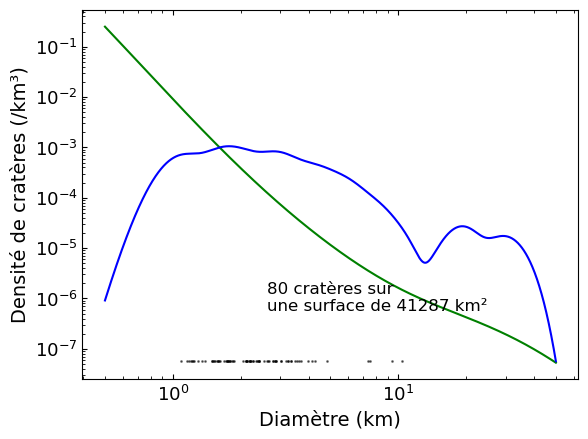

In [11]:
figure, sousFigure = initalisationFigureDensite()
figureDensite(sousFigure, vecteurDiamModele, isochrone, 'green')
figureDensite(sousFigure, vecteurDiamModele, CSFD, 'blue')
figureCrateres(sousFigure, diamCrat, aire)

plt.show(figure)